### 1. Install and import the required packages

In [ ]:
import pandas as pd
import ast
def extract_words_from_json_string(input_string):
    try:
        # Use ast.literal_eval to safely convert the string to a list
        result_list = ast.literal_eval(input_string)
        if isinstance(result_list, list):
            return result_list
        else:
            raise ValueError("Input is not a string representation of a list.")
    except (ValueError, SyntaxError) as e:
        print(f"Error converting string to list: {e}")
        return None

def len_chcek(row):
      return [w for w in row if (len(w) >4) or (w == "sars") ]


Gard = pd.read_csv('/content/Gard_V1.csv')
Gard['Synonyms'] = Gard['Synonyms'].apply(lambda x: extract_words_from_json_string(x))
Gard['Synonyms'] =Gard['GardName'].apply(lambda x: [x])+Gard['Synonyms']

#######################          BOW       ########################################################################
from itertools import permutations
def generate_term_orders(terms):
    words = terms.split()
    if len(words) ==2:
      all_permutations = list(permutations(words))
      orders = [' '.join(permutation) for permutation in all_permutations]
      return orders
    else: return [terms]

def generate_term_orders_list_of_sords(words):
    X=[]
    for i in words:
      X+=generate_term_orders(i)
    return X
#Gard['Synonyms_bow']=Gard['Synonyms'].apply(lambda x: generate_term_orders_list_of_sords(x) )

########################      Removing stop words  #########################################################
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Download the stop words dataset
nltk.download('stopwords')
nltk.download('punkt')

def process_row(row):
    words = row.split()
    if len(words) > 2 :
        words = [word.lower()  for word in words if word.lower() not in ['syndrome','syndromes', 'disease','diseases']]
    return ' '.join(words)
def process_row_list(row):
      return [process_row(w) for w in row]
Gard['Synonyms_sw'] = Gard['Synonyms']#.apply(lambda x: process_row_list(x))
Gard['Synonyms_sw_bow']=Gard['Synonyms_sw'].apply(lambda x: generate_term_orders_list_of_sords(x) )
Gard['Synonyms_sw_bow']=Gard['Synonyms_sw_bow'].apply(lambda x: list(set(len_chcek(x))) )

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
def process_row_list_2(row):
    return [remove_stop_words(w) if (remove_stop_words(w) != '' and len(w.split()) > 2) else w for w in row]

#Gard['Synonyms_sw_nltk'] = Gard['Synonyms_sw'].apply(lambda x: process_row_list_2(x))
#Gard['Synonyms_sw_nltk']=Gard['Synonyms_sw_nltk']+Gard['Synonyms_sw']
#Gard['Synonyms_sw_nltk'] = Gard['Synonyms_sw_nltk'].apply(lambda x: list(set(x)))

########################      Text stemming  #########################################################
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
def stem_text(text):
    # Initialize the Porter Stemmer
    stemmer = PorterStemmer()
    # Remove punctuation
    text_without_punctuation = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text into words
    words = word_tokenize(text_without_punctuation)
    # Perform stemming on each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text
def stem_text_list(row):
      return [stem_text(w) for w in row if len(stem_text(w)) >2 ]

#Gard['Synonyms_stem'] = Gard['Synonyms'].apply(lambda x: stem_text_list(x))
#Gard['Synonyms_stem_bow']=Gard['Synonyms_stem'].apply(lambda x: generate_term_orders_list_of_sords(x) )
Gard['Synonyms_sw_stem'] = Gard['Synonyms_sw'].apply(lambda x: stem_text_list(x))
Gard['Synonyms_sw_stem_bow']=Gard['Synonyms_sw_stem'].apply(lambda x: generate_term_orders_list_of_sords(x) )
#### make different
Gard['Synonyms_sw_stem'] = Gard['Synonyms_sw_stem'].apply(lambda x:list(set(len_chcek(x))) )
Gard['Synonyms_sw_stem_bow']=Gard['Synonyms_sw_stem_bow'].apply(lambda x: list(set(len_chcek(x))) )

Gard['Synonyms_sw'] = Gard['Synonyms_sw'].apply(lambda x: list(set(len_chcek(x))) )


Excluding_list = [
    'GARD:10311', 'GARD:10984', 'GARD:12351', 'GARD:12352', 'GARD:12638',
    'GARD:12915', 'GARD:12976', 'GARD:12977', 'GARD:15010', 'GARD:15042',
    'GARD:15066', 'GARD:15076', 'GARD:15080', 'GARD:15092', 'GARD:15112',
    'GARD:15119', 'GARD:15191', 'GARD:15192', 'GARD:15211', 'GARD:15300',
    'GARD:15315', 'GARD:15316', 'GARD:15357', 'GARD:15388', 'GARD:15394',
    'GARD:15395', 'GARD:15401', 'GARD:15402', 'GARD:15403', 'GARD:15415',
    'GARD:15422', 'GARD:15432', 'GARD:15443', 'GARD:15467', 'GARD:15483',
    'GARD:15504', 'GARD:15513', 'GARD:15525', 'GARD:15555', 'GARD:15564',
    'GARD:15565', 'GARD:15566', 'GARD:15567', 'GARD:15587', 'GARD:15600',
    'GARD:15603', 'GARD:15604', 'GARD:15605', 'GARD:15606', 'GARD:15607',
    'GARD:15608', 'GARD:15632', 'GARD:15637', 'GARD:15650', 'GARD:15651',
    'GARD:15657', 'GARD:15659', 'GARD:15696', 'GARD:15697', 'GARD:15752',
    'GARD:15779', 'GARD:15784', 'GARD:15785', 'GARD:15788', 'GARD:15848',
    'GARD:15853', 'GARD:15854', 'GARD:15986', 'GARD:15992', 'GARD:16059',
    'GARD:16131', 'GARD:16161', 'GARD:16184', 'GARD:16265', 'GARD:16267',
    'GARD:16269', 'GARD:16334', 'GARD:16337', 'GARD:16823', 'GARD:17047',
    'GARD:17343', 'GARD:17457', 'GARD:17458', 'GARD:17459', 'GARD:17460',
    'GARD:17461', 'GARD:17462', 'GARD:17463', 'GARD:17464', 'GARD:17465',
    'GARD:17514', 'GARD:17612', 'GARD:17795', 'GARD:17861', 'GARD:18046',
    'GARD:18057', 'GARD:18059', 'GARD:18060', 'GARD:18061', 'GARD:18259',
    'GARD:18285', 'GARD:18304', 'GARD:18384', 'GARD:18385', 'GARD:18472',
    'GARD:18477', 'GARD:18479', 'GARD:18485', 'GARD:18486', 'GARD:18512',
    'GARD:18550', 'GARD:18575', 'GARD:18577', 'GARD:18578', 'GARD:18579',
    'GARD:18580', 'GARD:18581', 'GARD:18582', 'GARD:18594', 'GARD:18595',
    'GARD:18596', 'GARD:18608', 'GARD:18609', 'GARD:18613', 'GARD:20322',
    'GARD:21425', 'GARD:2162', 'GARD:21865', 'GARD:22318', 'GARD:22319',
    'GARD:2456', 'GARD:3363', 'GARD:3364', 'GARD:3365', 'GARD:3366',
    'GARD:3367', 'GARD:3368', 'GARD:9185'
]
Excluding_list = ['GARD:{:07d}'.format(int(gard_id.split(':')[1])) for gard_id in Excluding_list]
Gard['GardId'] = Gard['GardId'].str.strip('"')
Gard = Gard[~Gard['GardId'].isin(Excluding_list)]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1. Install and import the required packages[link text](https://)

In [ ]:
!pip install transformers sentence-transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 19.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.

In [ ]:
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, models
from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup
import torch
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import time
import datetime
import random
import numpy as np
import pandas as pd

### 2. Use Google Colab's GPU for training

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-16GB


https://huggingface.co/docs/datasets/index

https://huggingface.co/datasets

https://livingdatalab.com/posts/2023-04-02-fine-tuning-a-pretrained-model-with-hugging-face.html

https://huggingface.co/datasets/EMBO/BLURB#:~:text=BC5%2Ddisease,support%20text%2Dmining%20method%20development.

https://huggingface.co/datasets/qanastek/Biosses-BLUE

### **3.** Load and preview the Semantic Textual Similarity Benchmark (STSB) dataset

In [ ]:
# Load the English version of the STSB dataset
dataset = load_dataset("stsb_multi_mt", "en")                    #8,628 examples
#raw_datasets = load_dataset("glue", "mrpc")                       #5,801
raw_datasets = load_dataset("qanastek/Biosses-BLUE") #the Biomedical Semantic Similarity Estimation System (BIOSSES)   #100 annotated examples in total

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/1500 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for qanastek/Biosses-BLUE contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/qanastek/Biosses-BLUE
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
print(dataset)  #8628

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'similarity_score'],
        num_rows: 5749
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'similarity_score'],
        num_rows: 1379
    })
    dev: Dataset({
        features: ['sentence1', 'sentence2', 'similarity_score'],
        num_rows: 1500
    })
})


In [ ]:
print("A sample from the STSB dataset's training split:")
print(dataset['train'][0])

A sample from the STSB dataset's training split:
{'sentence1': 'A plane is taking off.', 'sentence2': 'An air plane is taking off.', 'similarity_score': 5.0}


In [ ]:
print(raw_datasets)

DatasetDict({
    train: Dataset({
        features: ['id', 'sentence1', 'sentence2', 'score'],
        num_rows: 64
    })
    validation: Dataset({
        features: ['id', 'sentence1', 'sentence2', 'score'],
        num_rows: 16
    })
    test: Dataset({
        features: ['id', 'sentence1', 'sentence2', 'score'],
        num_rows: 20
    })
})


In [ ]:
print("A sample from the STSB dataset's training split:")
print(raw_datasets['validation'][4])

A sample from the STSB dataset's training split:
{'id': '4', 'sentence1': 'miR-Vec constructs were described before, and Dnd1 open-reading frames were cloned as described into a pCS2-based CMV expression vector to contain a double carboxy-terminal HA tag.', 'sentence2': 'The pMSCV-blast-miR plasmids, containing either hsa-miR-376a1 human miRNA or control miRNA (hTR-human telomerase RNA), were constructed as described previously.', 'score': 1.0}


# Building dataset

In [ ]:
ORPHAlinearisation=pd.read_csv('/content/ORPHAlinearisation_en.csv', encoding='ISO-8859-1')
ORPHAlinearisation['Name7'].unique() #.columns#['Name7'] ['Name']
linearisation_ = {
    'Rare bone disease': None,
    'Rare neurologic disease': None,
    'Rare inborn errors of metabolism': None,
    'Rare developmental defect during embryogenesis': None,
    'Rare hematologic disease': None,
    'Rare skin disease': None,
    'Rare odontologic disease': None,
    'Rare cardiac disease': None,
    'Rare infectious disease': None,
    'Rare respiratory disease': None,
    'Rare ophthalmic disorder': None,
    'Rare neoplastic disease': None,
    'Rare renal disease': None,
    'Rare systemic or rheumatologic disease': None,
    'Rare gastroenterologic disease': None,
    'Rare immune disease': None,
    'Rare hepatic disease': None,
    'Rare otorhinolaryngologic disease': None,
    'Rare endocrine disease': None,
    'Rare infertility': None,
    'Rare genetic disease': None,
    'Rare gynecologic or obstetric disease': None,
    'Rare circulatory system disease': None,
    'Rare abdominal surgical disease': None,
    'Rare maxillo-facial surgical disease': None,
    'Rare urogenital disease': None,
    'Rare disorder due to toxic effects': None,
    'Rare surgical thoracic disease': None,
    'Rare surgical cardiac disease': None
}

for i in linearisation_:
      linearisation_[i]=    list(ORPHAlinearisation[ORPHAlinearisation['Name7']==i]['Name'].unique())

In [ ]:
help1=pd.read_csv('/content/J_OMIM-.csv')
omim_=dict()
for i in help1.index:
      omim_[help1['OMIM'][i]]=help1['Description'][i]

In [ ]:
All_sentence=[i['sentence1'] for i in dataset['train']]+[i['sentence2'] for i in dataset['train']]
All_sentence+=[i['sentence1'] for i in dataset['test']]+[i['sentence2'] for i in dataset['test']]
All_sentence+=[i['sentence1'] for i in dataset['dev']]+[i['sentence2'] for i in dataset['dev']]

In [ ]:
dataset['train'][0]

{'sentence1': 'A plane is taking off.',
 'sentence2': 'An air plane is taking off.',
 'similarity_score': 5.0}

In [ ]:
help=pd.read_csv('/content/J_GARD_master.csv')

def parse_synonyms_string(synonyms_string):
  if type(synonyms_string) ==str:
    # Remove the brackets from the string
    synonyms_string = synonyms_string.strip('[]')
    # Split the string by comma and strip whitespace from each element
    synonyms_list = [synonym.strip() for synonym in synonyms_string.split(',')]
    return synonyms_list
  else:
    return []
help['SourceSynonym']=help.apply(lambda x: parse_synonyms_string(x['SourceSynonym']), axis=1)
help['OmimMember']=help.apply(lambda x: parse_synonyms_string(x['OmimMember']), axis=1)

In [ ]:
manual_smaple=pd.read_csv('/content/final_result_.csv')
for i in range(400):
  if  manual_smaple['Evaluation '][i] not in ['tru','fals'] and manual_smaple['Evaluation_llm '][i] in ['tru','fals']:
       manual_smaple.at[i,'Evaluation ']= manual_smaple['Evaluation_llm '][i]
manual_smaple=manual_smaple[manual_smaple['Evaluation '].isin(['tru','fals','T','F'] )]

def find_score(x):
   if x  in ['tru','T']:
       return 4.7
   if x  in ['fals','F']:
       return 0.5

manual_smaple['Evaluation_score']=manual_smaple.apply(lambda x:   find_score(x['Evaluation ']),axis=1)
for i in manual_smaple[manual_smaple['abstract_text'].isnull() ==True].index:
      manual_smaple.at[i,'abstract_text']= manual_smaple['project_title'][i]

manual_smaple_info=manual_smaple[['abstract_text','GardName','Part of the abstract that include the GARD name','Evaluation ','Evaluation_score','phr_text', 'project_title']]
print(manual_smaple_info.shape[0])
manual_smaple_info_shuffled = manual_smaple_info.sample(frac=1).reset_index(drop=True)
manual_smaple_info_shuffled.head()

1864


,abstract_text,GardName,Part of the abstract that include the GARD name,Evaluation,Evaluation_score,phr_text,project_title
0,The majority of patients afflicted with a T-ce...,lymphoma,the majority of patients afflicted with a t.ce...,tru,4.7,PROJECT NARRATIVE (from the parent grant appli...,THE T-CELL RECEPTOR'S ROLE IN T-CELL LYMPHOMA ...
1,PROJECT SUMMARY\n The Nadell lab studies the s...,cholera,project summary\n the nadell lab studies the s...,fals,0.5,PROJECT NARRATIVE\nAcute and chronic bacterial...,Bacterial and Viral Predator-Prey Dynamics wit...
2,PROJECT SUMMARY\nVirus-associated lymphomas ca...,non-hodgkin lymphoma,narrative / public health statement\nnon.hodgk...,tru,4.7,NARRATIVE / PUBLIC HEALTH STATEMENT\nNon-Hodgk...,Exposing synthetic lethal vulnerabilities in E...
3,PROJECT SUMMARY\nDespite the availability of e...,amyotrophic lateral sclerosis,"as a result, non.canonical dna conformations h...",F,0.5,PROJECT NARRATIVE\nNon-canonical DNA conformat...,Non-B DNA and Genome Evolution
4,Abstract/Summary\nIn vitro neural crest-like c...,hirschsprung disease,this proposal describes an ambitious project d...,tru,4.7,Narrative\nSpatial patterning within the embry...,Molecular and cellular pathways driving compet...


In [ ]:
import pandas as pd

# Assuming Data_ is your DataFrame
# Filter out rows with missing SourceDescription
Data_ = help.dropna(subset=['SourceDescription'])
# Initialize an empty list to store the new rows
new_rows = []
n=0
# Iterate over each row in the DataFrame
for index, row in Data_.iterrows():
    # Get the value of SourceDescription
    source_description = row['SourceDescription']
    # Get the values of SourceSynonym or SourceName
    synonyms = row['SourceSynonym']
    source_name = row['SourceName']
    Omim_Member=row['OmimMember']

    # If SourceSynonym is not empty, use its values; otherwise, use SourceName
    source_names = synonyms if synonyms else [source_name]
    # Create a new row for each SourceSynonym or SourceName
    if type(source_description) ==str:
      new_row = {'sentence1': source_name, 'sentence2': source_description, 'similarity_score': 5}
      new_rows.append(new_row)

      new_row = {'sentence1': source_description, 'sentence2': All_sentence[n % len(All_sentence) ], 'similarity_score': 0}
      n+=1
      new_rows.append(new_row)

      for name in synonyms:
        new_row = {'sentence1': name, 'sentence2': source_description, 'similarity_score': 5}
        new_rows.append(new_row)
        new_row = {'sentence1': name, 'sentence2': source_name, 'similarity_score': 5}
        new_rows.append(new_row)

      #Orphanet and Omim: similiar  5
      if row['DataSource'] in ['Orphanet','GARD'] and len(Omim_Member)==1:
         omim_des=omim_.get( int(Omim_Member[0]),'')
         if source_description.lower() !=  omim_des.lower() and omim_des != '':
                   new_row = {'sentence1': source_description, 'sentence2': omim_des, 'similarity_score': 5}
                   new_rows.append(new_row)
#######################################################################################

# ORPHAlinearisation:  similiar  1
num_sample=30000
A=[[] for _ in range(len(linearisation_))]
n=0
for i in linearisation_:
      for m in range(len(linearisation_[i])):
            a=     linearisation_[i][m].lower()
            try:
                   A[n].append(list(Data_[Data_['SourceName'].str.lower() == a.lower()]['SourceDescription'].values)[0])
            except: pass
      n+=1
for _ in range(num_sample):
  ran_number=random.sample(range(29), 2)
  sen_A  =  A[ran_number[0]] [random.randint(0, len(A[ran_number[0]] )-1 )]
  sen_B  =  A[ran_number[1]] [random.randint(0, len(A[ran_number[1]] )-1 )]
  new_row = {'sentence1': sen_A, 'sentence2': sen_B, 'similarity_score': 0.5}
  new_rows.append(new_row)

##########################################################################################
for i in dataset['train']:
        new_row = {'sentence1':  i['sentence1'] , 'sentence2': i['sentence2'], 'similarity_score': i['similarity_score']}
        new_rows.append(new_row)
for i in dataset['test']:
        new_row = {'sentence1':  i['sentence1'] , 'sentence2': i['sentence2'], 'similarity_score': i['similarity_score']}
        new_rows.append(new_row)
for i in dataset['dev']:
        new_row = {'sentence1':  i['sentence1'] , 'sentence2': i['sentence2'], 'similarity_score': i['similarity_score']}
        new_rows.append(new_row)


#####################################   manual sample 2000 ###########################
for i in manual_smaple_info.index:
        new_row = {'sentence1':  manual_smaple_info['abstract_text'][i] , 'sentence2': manual_smaple_info['GardName'][i] , 'similarity_score': manual_smaple_info['Evaluation_score'][i]}
        new_rows.append(new_row)



#######################################################3
# Create a new DataFrame from the list of new rows
new_df = pd.DataFrame(new_rows)
# Optionally, you can reset the index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
shuffled_data = new_df.sample(frac=1).reset_index(drop=True)
###############################################################
shuffled_data = shuffled_data.drop_duplicates()
shuffled_data.shape[0]

85048

In [ ]:
from datasets import DatasetDict, Dataset

# Assuming 'shuffled_data' is your shuffled DataFrame
train_size = int(len(shuffled_data) * 0.67  ) #  0.5749)
test_size = int(len(shuffled_data) * 0.16)    #0.1379)
dev_size = int(len(shuffled_data) * 0.17)     #0.1500)

# Split the shuffled DataFrame into train, test, and dev sets
train_data = shuffled_data[:train_size]
test_data = shuffled_data[train_size:train_size+test_size]
dev_data = shuffled_data[train_size+test_size:]

# Create DatasetDict
data_dict = DatasetDict({
    'train': Dataset.from_pandas(train_data),
    'test': Dataset.from_pandas(test_data),
    'dev': Dataset.from_pandas(dev_data)
})

# Display information about the dataset
print(data_dict)
dataset=data_dict

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'similarity_score', '__index_level_0__'],
        num_rows: 56982
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'similarity_score', '__index_level_0__'],
        num_rows: 13607
    })
    dev: Dataset({
        features: ['sentence1', 'sentence2', 'similarity_score', '__index_level_0__'],
        num_rows: 14459
    })
})


### **4.** Define the dataset loader class


In [ ]:
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, RobertaTokenizer, RobertaModel

# Instantiate the BERT tokenizer
# You can use larger variants of the model, here we're using the base model
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#tokenizer = AutoTokenizer.from_pretrained('bionlp/bluebert_pubmed_mimic_uncased_L-24_H-1024_A-16')
#tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
#tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-large")
#tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
tokenizer = AutoTokenizer.from_pretrained('microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext')
#tokenizer = AutoTokenizer.from_pretrained('NeuML/pubmedbert-base-embeddings')
#tokenizer = AutoTokenizer.from_pretrained('FremyCompany/BioLORD-2023')
'''
    "bionlp/bluebert_pubmed_mimic_uncased_L-24_H-1024_A-16",
    "allenai/biomed_roberta_base",
    "dmis-lab/biobert-v1.1",
    "emilyalsentzer/Bio_ClinicalBERT",
    "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
PubMedBERT-large
PubMedELECTRA models
'''

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

'\n    "bionlp/bluebert_pubmed_mimic_uncased_L-24_H-1024_A-16",\n    "allenai/biomed_roberta_base",\n    "dmis-lab/biobert-v1.1",\n    "emilyalsentzer/Bio_ClinicalBERT",\n    "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"\nPubMedBERT-large\nPubMedELECTRA models\n'

In [ ]:
class STSBDataset(torch.utils.data.Dataset):

    def __init__(self, dataset):

        # Normalize the similarity scores in the dataset
        similarity_scores = [i['similarity_score'] for i in dataset]
        self.normalized_similarity_scores = [i/5.0 for i in similarity_scores]
        self.first_sentences = [i['sentence1'] for i in dataset]
        self.second_sentences = [i['sentence2'] for i in dataset]
        self.concatenated_sentences = [[str(x), str(y)] for x,y in zip(self.first_sentences, self.second_sentences)]

    def __len__(self):
        return len(self.concatenated_sentences)

    def get_batch_labels(self, idx):
        return torch.tensor(self.normalized_similarity_scores[idx])

    def get_batch_texts(self, idx):
        return tokenizer(self.concatenated_sentences[idx], padding='max_length', max_length=512, truncation=True, return_tensors="pt")

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)
        return batch_texts, batch_y


def collate_fn(texts):
    input_ids = texts['input_ids']
    attention_masks = texts['attention_mask']
    features = [{'input_ids': input_id, 'attention_mask': attention_mask}
                for input_id, attention_mask in zip(input_ids, attention_masks)]
    return features

### 5. Define the model class based on BERT

In [ ]:
class BertForSTS(torch.nn.Module):

    def __init__(self):
        super(BertForSTS, self).__init__()
        #self.bert = models.Transformer("bert-base-uncased", max_seq_length=512)
        self.bert = models.Transformer('microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext', max_seq_length=512)
        #model = AutoModel.from_pretrained(model_name)
        self.pooling_layer = models.Pooling(self.bert.get_word_embedding_dimension())
        self.sts_bert = SentenceTransformer(modules=[self.bert, self.pooling_layer])

    def forward(self, input_data):
        output = self.sts_bert(input_data)['sentence_embedding']
        return output

#models.Transformer('NeuML/pubmedbert-base-embeddings')
#AutoModel.from_pretrained('bert-base-uncased')
#AutoModel.from_pretrained('bionlp/bluebert_pubmed_mimic_uncased_L-24_H-1024_A-16')
#AutoModel.from_pretrained("dmis-lab/biobert-v1.1")
#AutoModel.from_pretrained("FacebookAI/roberta-large")
#AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
#AutoModel.from_pretrained('microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext')
#AutoModel.from_pretrained('NeuML/pubmedbert-base-embeddings')
#AutoModel.from_pretrained('FremyCompany/BioLORD-2023')

In [ ]:
# Instantiate the model and move it to GPU
model = BertForSTS()
model.to(device)

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertForSTS(
  (bert): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (pooling_layer): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (sts_bert): SentenceTransformer(
    (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
    (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  )
)

### 6. Define the Cosine Similarity loss function

In [ ]:
class CosineSimilarityLoss(torch.nn.Module):

    def __init__(self,  loss_fn=torch.nn.MSELoss(), transform_fn=torch.nn.Identity()):
        super(CosineSimilarityLoss, self).__init__()
        self.loss_fn = loss_fn
        self.transform_fn = transform_fn
        self.cos_similarity = torch.nn.CosineSimilarity(dim=1)

    def forward(self, inputs, labels):
        emb_1 = torch.stack([inp[0] for inp in inputs])
        emb_2 = torch.stack([inp[1] for inp in inputs])
        outputs = self.transform_fn(self.cos_similarity(emb_1, emb_2))
        return self.loss_fn(outputs, labels.squeeze())

### 7. Prepare the training and validation data split

In [ ]:
train_ds = STSBDataset(dataset['train'])
val_ds = STSBDataset(dataset['dev'])

# Create a 90-10 train-validation split.
train_size = len(train_ds)
val_size = len(val_ds)

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

56,982 training samples
14,459 validation samples


In [ ]:
batch_size = 8

train_dataloader = DataLoader(
            train_ds,  # The training samples.
            num_workers = 4,
            batch_size = batch_size, # Use this batch size.
            shuffle=True # Select samples randomly for each batch
        )

validation_dataloader = DataLoader(
            val_ds,
            num_workers = 4,
            batch_size = batch_size # Use the same batch size
        )

### 8. Define the Optimizer and Scheduler

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)

In [ ]:
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs].
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

### 9. Define a helper function for formatting the elapsed training time as `hh:mm:ss`

In [ ]:
# Takes a time in seconds and returns a string hh:mm:ss
def format_time(elapsed):
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

### 10. Define the training function, and start the training loop

In [ ]:
def train():
  seed_val = 42

  criterion = CosineSimilarityLoss()
  criterion = criterion.to(device)

  random.seed(seed_val)
  torch.manual_seed(seed_val)

  # We'll store a number of quantities such as training and validation loss,
  # validation accuracy, and timings.
  training_stats = []
  total_t0 = time.time()

  for epoch_i in range(0, epochs):

      # ========================================
      #               Training
      # ========================================

      print("")
      print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
      print('Training...')

      t0 = time.time()

      total_train_loss = 0

      model.train()

      # For each batch of training data...
      for train_data, train_label in tqdm(train_dataloader):

          train_data['input_ids'] = train_data['input_ids'].to(device)
          train_data['attention_mask'] = train_data['attention_mask'].to(device)

          train_data = collate_fn(train_data)
          model.zero_grad()

          output = [model(feature) for feature in train_data]

          loss = criterion(output, train_label.to(device))
          total_train_loss += loss.item()

          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
          optimizer.step()
          scheduler.step()


      # Calculate the average loss over all of the batches.
      avg_train_loss = total_train_loss / len(train_dataloader)

      # Measure how long this epoch took.
      training_time = format_time(time.time() - t0)

      print("")
      print("  Average training loss: {0:.5f}".format(avg_train_loss))
      print("  Training epoch took: {:}".format(training_time))

      # ========================================
      #               Validation
      # ========================================

      print("")
      print("Running Validation...")

      t0 = time.time()

      model.eval()

      total_eval_accuracy = 0
      total_eval_loss = 0
      nb_eval_steps = 0

      # Evaluate data for one epoch
      for val_data, val_label in tqdm(validation_dataloader):

          val_data['input_ids'] = val_data['input_ids'].to(device)
          val_data['attention_mask'] = val_data['attention_mask'].to(device)

          val_data = collate_fn(val_data)

          with torch.no_grad():
              output = [model(feature) for feature in val_data]

          loss = criterion(output, val_label.to(device))
          total_eval_loss += loss.item()

      # Calculate the average loss over all of the batches.
      avg_val_loss = total_eval_loss / len(validation_dataloader)

      # Measure how long the validation run took.
      validation_time = format_time(time.time() - t0)

      print("  Validation Loss: {0:.5f}".format(avg_val_loss))
      print("  Validation took: {:}".format(validation_time))

      # Record all statistics from this epoch.
      training_stats.append(
          {
              'epoch': epoch_i + 1,
              'Training Loss': avg_train_loss,
              'Valid. Loss': avg_val_loss,
              'Training Time': training_time,
              'Validation Time': validation_time
          }
      )

  print("")
  print("Training complete!")

  print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

  return model, training_stats

In [ ]:
# Launch the training
model, training_stats = train()


======== Epoch 1 / 2 ========
Training...


  0%|          | 0/7123 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 7123/7123 [1:03:46<00:00,  1.86it/s]



  Average training loss: 0.03271
  Training epoch took: 1:03:47

Running Validation...


100%|██████████| 1808/1808 [05:17<00:00,  5.70it/s]


  Validation Loss: 0.02331
  Validation took: 0:05:17

======== Epoch 2 / 2 ========
Training...


100%|██████████| 7123/7123 [1:03:53<00:00,  1.86it/s]



  Average training loss: 0.02029
  Training epoch took: 1:03:54

Running Validation...


100%|██████████| 1808/1808 [05:18<00:00,  5.67it/s]

  Validation Loss: 0.02159
  Validation took: 0:05:19

Training complete!
Total training took 2:18:17 (h:mm:ss)


In [ ]:
# Create a DataFrame from our training statistics
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index
df_stats = df_stats.set_index('epoch')

# Display the table
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,0.032714,0.023306,1:03:47,0:05:17
2,0.020288,0.021590,1:03:54,0:05:19


In [ ]:
test_dataset = load_dataset("stsb_multi_mt", name="en", split="test")

# Prepare the data
first_sent = [i['sentence1'] for i in test_dataset]
second_sent = [i['sentence2'] for i in test_dataset]
full_text = [[str(x), str(y)] for x,y in zip(first_sent, second_sent)]

In [ ]:
model.eval()

def predict_similarity(sentence_pair):
  test_input = tokenizer(sentence_pair, padding=True, truncation=False, return_tensors="pt").to(device) # max_length = 512,
  test_input['input_ids'] = test_input['input_ids']
  test_input['attention_mask'] = test_input['attention_mask']
  del test_input['token_type_ids']
  output = model(test_input)
  sim = torch.nn.functional.cosine_similarity(output[0], output[1], dim=0).item()
  return sim

In [ ]:
example_1 = full_text[100]
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")

Sentence 1: A cat is walking around a house.
Sentence 2: A woman is peeling potato.
Predicted similarity score: -0.07


In [ ]:
full_text.append(
[  'polymyositis',
 '''
 A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyography, and muscle biopsy showing endomyial infiltration composed mainly of macrophages and lymphocytes. The features are non-specific, thus the disease should be distinguished from similar entities with specific clinical, immunological, histological features, notably dermatomyositis, immune-mediated necrotizing myopathy, anti-synthetase syndrome, inclusion body myositis, and myositis associated with other connective tissue disorder.
   '''
])
example_1 = full_text[-1]
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")

Sentence 1: polymyositis
Sentence 2: 
 A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyography, and muscle biopsy showing endomyial infiltration composed mainly of macrophages and lymphocytes. The features are non-specific, thus the disease should be distinguished from similar entities with specific clinical, immunological, histological features, notably dermatomyositis, immune-mediated necrotizing myopathy, anti-synthetase syndrome, inclusion body myositis, and myositis associated with other connective tissue disorder.
   
Predicted similarity score: 0.84


In [ ]:
example_2 = full_text[130]
print(f"Sentence 1: {example_2[0]}")
print(f"Sentence 2: {example_2[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_2), 2)}")

Sentence 1: Two men are playing football.
Sentence 2: Two men are practicing football.
Predicted similarity score: 0.96


In [ ]:
example_3 = full_text[812]
print(f"Sentence 1: {example_3[0]}")
print(f"Sentence 2: {example_3[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_3), 2)}")

Sentence 1: It varies by the situation.
Sentence 2: This varies by institution.
Predicted similarity score: 0.44


### Saving the model!

In [ ]:
PATH = 'bert_finetunned_grant.pt'
torch.save(model.state_dict(), PATH)

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
# Save the model
PATH = '/content/drive/My Drive/Finetunned_Bert_2.pt'
torch.save(model.state_dict(), PATH)

Mounted at /content/drive


In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
# Save the model
PATH = '/content/drive/My Drive/Finetunned_Bert_2.pt'
# In order to load the model
# First, you have to create an instance of the model's class
# And use the saving path for the loading
# Don't forget to set the model to the evaluation state using .eval()
model = BertForSTS()
model.load_state_dict(torch.load(PATH))
model.eval()

print("##########################################################################################")
example_1=[ 'A cat is walking around a house.', 'A woman is peeling potato']
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")

print("##########################################################################################")
example_1=[  'arterial thoracic outlet syndrome',
 '''
 The objective of this project is to study the contribution of hemorrheology to arterial and venous thrombosis using the arterio-venous (A-V)
   ''']
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")


print("##########################################################################################")
example_1=['antisynthetase syndrome',
 '''
  A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyography, and muscle biopsy showing endomyial infiltration composed mainly of macrophages and lymphocytes. The features are non-specific, thus the disease should be distinguished from similar entities with specific clinical, immunological, histological features, notably dermatomyositis, immune-mediated necrotizing myopathy, anti-synthetase syndrome, inclusion body myositis, and myositis associated with other connective tissue disorder.
''']
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")

print("##########################################################################################")
##(one of its synonym is childhood cancer)
example_1=['mismatch repair cancer syndrome 1 '
,
'''
childhood cancer''']

print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")

print("##########################################################################################")
example_1=[  'polymyositis',
 '''
 A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyography, and muscle biopsy showing endomyial infiltration composed mainly of macrophages and lymphocytes. The features are non-specific, thus the disease should be distinguished from similar entities with specific clinical, immunological, histological features, notably dermatomyositis, immune-mediated necrotizing myopathy, anti-synthetase syndrome, inclusion body myositis, and myositis associated with other connective tissue disorder.
   '''
]
print(f"Sentence 1: {example_1[0]}")
print(f"Sentence 2: {example_1[1]}")
print(f"Predicted similarity score: {round(predict_similarity(example_1), 2)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
##########################################################################################
Sentence 1: A cat is walking around a house.
Sentence 2: A woman is peeling potato
Predicted similarity score: -0.09
##########################################################################################
Sentence 1: arterial thoracic outlet syndrome
Sentence 2: 
 The objective of this project is to study the contribution of hemorrheology to arterial and venous thrombosis using the arterio-venous (A-V)
   
Predicted similarity score: 0.35
##########################################################################################
Sentence 1: antisynthetase syndrome
Sentence 2: 
  A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyograph

Sentence 1: A cat is walking around a house.
Sentence 2: A woman is peeling potato
Predicted similarity score: -0.07
Sentence 1: polymyositis
Sentence 2: 
 A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyography, and muscle biopsy showing endomyial infiltration composed mainly of macrophages and lymphocytes. The features are non-specific, thus the disease should be distinguished from similar entities with specific clinical, immunological, histological features, notably dermatomyositis, immune-mediated necrotizing myopathy, anti-synthetase syndrome, inclusion body myositis, and myositis associated with other connective tissue disorder.
   
Predicted similarity score: 0.95


In [ ]:
model = BertForSTS()
model.load_state_dict(torch.load('/content/bert_finetunned_grant.pt'))
model.eval()

BertForSTS(
  (bert): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (pooling_layer): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (sts_bert): SentenceTransformer(
    (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
    (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  )
)

# Sample 2000

In [ ]:
help=pd.read_csv('/content/J_GARD_master.csv')
source_dict = {}
for index, row in help.iterrows():
    source_name = row['SourceName']
    source_description = row['SourceDescription']
    if type(source_name) ==str:
       source_dict[source_name.lower()] = source_description

Final_result_=pd.read_csv('/content/final_result_.csv')

def get_def(a):
  if a.lower() in source_dict and type(source_dict[a.lower()]) == str: return  source_dict[a.lower()]
  else: return a
Final_result_['GardNamedef']=Final_result_.apply(lambda x:   get_def(x['GardName']), axis=1)

In [ ]:
for i in Final_result_[Final_result_['abstract_text'].isnull()].index:
  Final_result_.at[i,'abstract_text']=Final_result_['project_title'][i]

In [ ]:
import warnings
def is_about_term(a,b):
     #if type(a)==str  and type(b)==str:
     try:
         return round(predict_similarity([a,b]), 2)
     except:
         return round(predict_similarity([a[:1500],b[:1500]]), 2)

'''
'GardNamedef'
'abstract_text',
'GardName',
'Part of the abstract that include the GARD name',
'Evaluation ',
'Evaluation_score',
'phr_text',
 'project_title'
 '''

Final_result_['SEM_SIM_updated']=Final_result_.apply(lambda x:   is_about_term(x['GardNamedef'], x['abstract_text']), axis=1)



116

In [ ]:
Jaber=Final_result_[Final_result_['Reviewer']=='Jaber']
Qian=Final_result_[Final_result_['Reviewer']== 'Qian']
Riea=Final_result_[Final_result_['Reviewer']=='Riea']
Yanji=Final_result_[Final_result_['Reviewer']=='Yanji']
LLM=Final_result_[Final_result_['Evaluation_llm '].isin(['tru','fals'])]

def check_performance(Final_result_):
   true_=Final_result_[Final_result_['Evaluation '].isin(['tru','T'])]
   false_=Final_result_[Final_result_['Evaluation '].isin(['fals','F'])]
   res=pd.DataFrame()
   #res.at['True','SEM_SIM_ (part)']              =  true_['SEM_SIM (Compared to the part of the abstract that include the GARD name)'].mean()
   res.at['True','SEM_SIM_ (whole)']             =  true_['SEM_SIM (Compared to the whole abstract)'].mean()
   res.at['True','SEM_SIM_ (SEM_SIM_updated)']   =  true_['SEM_SIM_updated'].mean()
   #res.at['False','SEM_SIM_ (part)']              =  false_['SEM_SIM (Compared to the part of the abstract that include the GARD name)'].mean()
   res.at['False','SEM_SIM_ (whole)']             =  false_['SEM_SIM (Compared to the whole abstract)'].mean()
   res.at['False','SEM_SIM_ (SEM_SIM_updated)']   =  false_['SEM_SIM_updated'].mean()
   display(res)

print('------------------- All --------------')
check_performance(Final_result_)
print('------------------- Qian --------------')
check_performance(Qian)
print('------------------- Yanji --------------')
check_performance(Yanji)
print('------------------- Riea --------------')
check_performance(Riea)
print('------------------- Jaber --------------')
check_performance(Jaber)
print('------------------- LLM --------------')
check_performance(LLM)


------------------- All --------------


,SEM_SIM_ (whole),SEM_SIM_ (SEM_SIM_updated)
True,0.764302,0.806241
False,0.616520,0.502408


------------------- Qian --------------


,SEM_SIM_ (whole),SEM_SIM_ (SEM_SIM_updated)
True,0.759414,0.812422
False,0.585769,0.489615


------------------- Yanji --------------


,SEM_SIM_ (whole),SEM_SIM_ (SEM_SIM_updated)
True,0.802996,0.851806
False,0.632780,0.520673


------------------- Riea --------------


,SEM_SIM_ (whole),SEM_SIM_ (SEM_SIM_updated)
True,0.738778,0.778381
False,0.653980,0.552449


------------------- Jaber --------------


,SEM_SIM_ (whole),SEM_SIM_ (SEM_SIM_updated)
True,0.767775,0.801172
False,0.587252,0.463468


------------------- LLM --------------


,SEM_SIM_ (whole),SEM_SIM_ (SEM_SIM_updated)
True,0.760303,0.791818
False,0.600000,0.517500


In [ ]:
import warnings

import math
def normalize(x,a):
   if x < a:
       return math.log(x) / math.log(a)
   else:
    return 1


def get_eval(Qian, threshold,a):
   Qian['CONF_SCORE1']=Qian.apply(lambda X:  normalize(X['CONF_SCORE'],a) , axis=1)
   Qian['algo']=Qian.apply(lambda X:  cal_(X['CONF_SCORE1'],X['SEM_SIM_updated'],X['SEM_SIM_updated'],threshold)  ,axis=1)
   #print(Qian['algo'].isnull().sum())
   #print(Qian['algo'])
   res=pd.DataFrame()
   res.at['our:True','algo:True']   =    Qian[Qian['Evaluation '].isin(['tru','T'])  & Qian['algo'].isin(['tru','T'])].shape[0]
   res.at['our:True','algo:False']  =     Qian[Qian['Evaluation '].isin(['tru','T'])  & Qian['algo'].isin(['fals','F'])].shape[0]
   res.at['our:False','algo:True']  =     Qian[Qian['Evaluation '].isin(['fals','F'])  & Qian['algo'].isin(['tru','T'])].shape[0]
   res.at['our:False','algo:False'] = Qian[Qian['Evaluation '].isin(['fals','F'])  & Qian['algo'].isin(['fals','F'])].shape[0]
   All_=(res['algo:True']['our:True']+  res['algo:False']['our:False'])+(res['algo:False']['our:True']+  res['algo:True']['our:False'])
   accuracy= (res['algo:True']['our:True']+  res['algo:False']['our:False']) / All_
   #print('ave(CONF_SCORE , SEM_SIM (whole) ) > ', threshold, ',  Accuracy:',round(accuracy,3),', False positive:', res['algo:True']['our:False'] ,'(%', str(  round( 100*res['algo:True']['our:False'] / All_  ,3)  ),')')
   #
   #print(res)
   return [round(accuracy,3), res['algo:True']['our:False'] , str(  round( 100*res['algo:True']['our:False'] / All_  ,3)  )]

#get_eval(Qian, 0.5,10)

In [ ]:
utput=[]
Qian=Final_result_
def cal_(x,y,z,threshold):
   if z > threshold: return 'tru'
   else:               return  'fals'
for j in [0.1,0.3,0.5,0.6,0.7,0.9,0.95,0.99]:
             print('-----------------------------------------------------')
             get_eval(Qian, j,20)

-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.1 ,  Accuracy: 0.712 , False positive: 522.0 (% 28.65 )
           algo:True  algo:False
our:True      1250.0         3.0
our:False      522.0        47.0
-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.3 ,  Accuracy: 0.762 , False positive: 409.0 (% 22.448 )
           algo:True  algo:False
our:True      1228.0        25.0
our:False      409.0       160.0
-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.5 ,  Accuracy: 0.789 , False positive: 300.0 (% 16.465 )
           algo:True  algo:False
our:True      1168.0        85.0
our:False      300.0       269.0
-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.6 ,  Accuracy: 0.8 , False positive: 230.0 (% 12.623 )
           algo:True  algo:False
our:True      1118.0       135.0
our:False      230.0       339.0
---

In [ ]:

def cal_(x,y,z,threshold):
   if x*z > threshold: return 'tru'
   else:               return  'fals'
for j in [0.01,0.025,0.05, 0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.7,0.9]:
             print('-----------------------------------------------------')
             get_eval(Qian, j,20)

-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.01 ,  Accuracy: 0.714 , False positive: 479.0 (% 26.29 )
           algo:True  algo:False
our:True      1210.0        43.0
our:False      479.0        90.0
-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.025 ,  Accuracy: 0.718 , False positive: 469.0 (% 25.741 )
           algo:True  algo:False
our:True      1209.0        44.0
our:False      469.0       100.0
-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.05 ,  Accuracy: 0.734 , False positive: 437.0 (% 23.985 )
           algo:True  algo:False
our:True      1205.0        48.0
our:False      437.0       132.0
-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.1 ,  Accuracy: 0.76 , False positive: 371.0 (% 20.362 )
           algo:True  algo:False
our:True      1186.0        67.0
our:False      371.0       198.

In [ ]:
def cal_(x,y,z,threshold):
   if (x+z)/2 > threshold: return 'tru'
   else:               return  'fals'
for j in [0.01,0.025,0.05, 0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.7,0.9]:
             print('-----------------------------------------------------')
             get_eval(Qian, j,20)

-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.01 ,  Accuracy: 0.691 , False positive: 563.0 (% 30.9 )
           algo:True  algo:False
our:True      1253.0         0.0
our:False      563.0         6.0
-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.025 ,  Accuracy: 0.693 , False positive: 559.0 (% 30.681 )
           algo:True  algo:False
our:True      1253.0         0.0
our:False      559.0        10.0
-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.05 ,  Accuracy: 0.696 , False positive: 553.0 (% 30.351 )
           algo:True  algo:False
our:True      1253.0         0.0
our:False      553.0        16.0
-----------------------------------------------------
ave(CONF_SCORE , SEM_SIM (whole) ) >  0.1 ,  Accuracy: 0.701 , False positive: 543.0 (% 29.802 )
           algo:True  algo:False
our:True      1251.0         2.0
our:False      543.0        26.

In [ ]:
output=[]
def cal_(x,y,z,threshold):
   if x > threshold: return 'tru'
   else:               return  'fals'
#'CONF_SCORE1'],X['SEM_SIM
for i in [3,5,10,15,20,30]:
   for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1']  )

def cal_(x,y,z,threshold):
   if y > threshold: return 'tru'
   else:               return  'fals'

for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','SEM_SIM (part)']  )

def cal_(x,y,z,threshold):
   if z > threshold: return 'tru'
   else:               return  'fals'

for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','SEM_SIM (whole)']  )



def cal_(x,y,z,threshold):
   if x*y*z > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1*SEM_SIM (part)*SEM_SIM (whole)']  )

def cal_(x,y,z,threshold):
   if x*y > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1*SEM_SIM (part)']  )



def cal_(x,y,z,threshold):
   if x*z > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1*SEM_SIM (whole)']  )





def cal_(x,y,z,threshold):
   if (x+y+z) /3> threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
 for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
               output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1+SEM_SIM (part)+SEM_SIM (whole)']  )

def cal_(x,y,z,threshold):
   if (x+y)/2 > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1+SEM_SIM (part)']  )



def cal_(x,y,z,threshold):
   if (x+z)/2 > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1+SEM_SIM (whole)']  )



In [ ]:
print('------------------------    false positive  ----------------------------')

n=0
for j in output:
 if n<4:
  if j[1] <20: print(j);n+=1

print('------------------------   accuracy   ----------------------------')

n=0
for j in output:
 if n<4:
  if j[0] >0.79: print(j);n+=1

print('------------------------   both accuracy and false positive  ----------------------------')
n=0
for j in output:
 if n<4:
  if j[0] >0.74 and j[1] <100: print(j);n+=1


------------------------    false positive  ----------------------------
[0.318, 1.0, '0.055', 'threshold:', 0.9, 'norm_coe:', 30, 'fun:', 'CONF_SCORE1']
[0.314, 1.0, '0.055', 'threshold:', 0.95, 'norm_coe:', 30, 'fun:', 'CONF_SCORE1']
[0.35, 1.0, '0.055', 'threshold:', 0.95, 'norm_coe:', 30, 'fun:', 'SEM_SIM (part)']
[0.35, 1.0, '0.055', 'threshold:', 0.95, 'norm_coe:', 30, 'fun:', 'SEM_SIM (whole)']
------------------------   accuracy   ----------------------------
[0.796, 267.0, '14.654', 'threshold:', 0.55, 'norm_coe:', 30, 'fun:', 'SEM_SIM (part)']
[0.8, 230.0, '12.623', 'threshold:', 0.6, 'norm_coe:', 30, 'fun:', 'SEM_SIM (part)']
[0.795, 191.0, '10.483', 'threshold:', 0.65, 'norm_coe:', 30, 'fun:', 'SEM_SIM (part)']
[0.796, 267.0, '14.654', 'threshold:', 0.55, 'norm_coe:', 30, 'fun:', 'SEM_SIM (whole)']
------------------------   both accuracy and false positive  ----------------------------
[0.741, 96.0, '5.269', 'threshold:', 0.4, 'norm_coe:', 10, 'fun:', 'CONF_SCORE1*SEM_SIM 

In [ ]:
output=[]
def cal_(x,y,z,threshold):
   if x > threshold: return 'tru'
   else:               return  'fals'
#'CONF_SCORE1'],X['SEM_SIM
for i in [3,5,10,15,20,30]:
   for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1']  )

def cal_(x,y,z,threshold):
   if y > threshold: return 'tru'
   else:               return  'fals'

for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','SEM_SIM (part)']  )

def cal_(x,y,z,threshold):
   if z > threshold: return 'tru'
   else:               return  'fals'

for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','SEM_SIM (whole)']  )



def cal_(x,y,z,threshold):
   if x*y*z > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1*SEM_SIM (part)*SEM_SIM (whole)']  )

def cal_(x,y,z,threshold):
   if x*y > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1*SEM_SIM (part)']  )



def cal_(x,y,z,threshold):
   if x*z*z*z > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:',' x*z*z*z ']  )





def cal_(x,y,z,threshold):
   if (x+y+z) /3> threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
 for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
               output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1+SEM_SIM (part)+SEM_SIM (whole)']  )

def cal_(x,y,z,threshold):
   if (x+3*y)/4 > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','(x+3*y)/4 ']  )



def cal_(x,y,z,threshold):
   if (x+4*z)/5 > threshold: return 'tru'
   else:               return  'fals'
for i in [3,5,10,15,20,30]:
  for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','(x+4*z)/5' ]  )



In [ ]:
print('------------------------    false positive  ----------------------------')
n=0
for j in output:
 if n<4:
  if j[1] <2: print(j);n+=1
print('------------------------   accuracy   ----------------------------')
n=0
for j in output:
 if n<4:
  if j[0] >0.80: print(j);n+=1
print('------------------------   both accuracy and false positive  ----------------------------')
n=0
for j in output:
 if n<4:
  if j[0] >0.75 and j[1] <100: print(j);n+=1

------------------------    false positive  ----------------------------
[0.318, 1.0, '0.055', 'threshold:', 0.9, 'norm_coe:', 30, 'fun:', 'CONF_SCORE1']
[0.314, 1.0, '0.055', 'threshold:', 0.95, 'norm_coe:', 30, 'fun:', 'CONF_SCORE1']
[0.35, 1.0, '0.055', 'threshold:', 0.95, 'norm_coe:', 30, 'fun:', 'SEM_SIM (part)']
[0.35, 1.0, '0.055', 'threshold:', 0.95, 'norm_coe:', 30, 'fun:', 'SEM_SIM (whole)']
------------------------   accuracy   ----------------------------
[0.801, 220.0, '12.075', 'threshold:', 0.6, 'norm_coe:', 10, 'fun:', '(x+3*y)/4 ']
[0.801, 242.0, '13.282', 'threshold:', 0.55, 'norm_coe:', 20, 'fun:', '(x+3*y)/4 ']
[0.806, 228.0, '12.514', 'threshold:', 0.55, 'norm_coe:', 30, 'fun:', '(x+3*y)/4 ']
[0.802, 224.0, '12.294', 'threshold:', 0.6, 'norm_coe:', 10, 'fun:', '(x+4*z)/5']
------------------------   both accuracy and false positive  ----------------------------
[0.755, 98.0, '5.379', 'threshold:', 0.2, 'norm_coe:', 30, 'fun:', ' x*z*z*z ']
[0.76, 97.0, '5.324', 'th

In [ ]:
output=[]
def cal_(x,y,z,threshold):
   if x*z > threshold: return 'tru'
   else:               return  'fals'
#'CONF_SCORE1'],X['SEM_SIM
for i in [3,4,5,6,7,8,9,10,15,20,30]:
   for j in [0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.625,0.65,.675,0.7,0.8,0.9,0.95]:
              output.append(   get_eval(Qian, j,i)+['threshold:',j,'norm_coe:',i,'fun:','CONF_SCORE1*sem_sim']  )
print('------------------------   both accuracy and false positive  ----------------------------')
n=0
for j in output:
 if n<4:
  if j[0] >0.73 and j[1] <100: print(j);n+=1



------------------------   both accuracy and false positive  ----------------------------
[0.735, 96.0, '5.269', 'threshold:', 0.7, 'norm_coe:', 4, 'fun:', 'CONF_SCORE1*sem_sim']
[0.739, 99.0, '5.434', 'threshold:', 0.65, 'norm_coe:', 5, 'fun:', 'CONF_SCORE1*sem_sim']
[0.732, 97.0, '5.324', 'threshold:', 0.65, 'norm_coe:', 6, 'fun:', 'CONF_SCORE1*sem_sim']
[0.734, 98.0, '5.379', 'threshold:', 0.625, 'norm_coe:', 7, 'fun:', 'CONF_SCORE1*sem_sim']


# Sample 200

In [ ]:
help=pd.read_csv('/content/J_GARD_master.csv')
source_dict = {}
for index, row in help.iterrows():
    source_name = row['SourceName']
    source_description = row['SourceDescription']
    if type(source_name) ==str:
       source_dict[source_name.lower()] = source_description

Final_result_=pd.read_csv('/content/sample_200.csv')
Final_result_=Final_result_[Final_result_['Evaluation'].isin(['tru','fals'])]

In [ ]:
def get_def(a):
  if a.lower() in source_dict and type(source_dict[a.lower()]) == str: return  source_dict[a.lower()]
  else: return a
Final_result_['GardNamedef']=Final_result_.apply(lambda x:   get_def(x['GardName']), axis=1)
for i in Final_result_[Final_result_['abstract_text'].isnull()].index:
  Final_result_.at[i,'abstract_text']=Final_result_['project_title'][i]

In [ ]:
Final_result_.columns

Index(['abstract_text', 'project_title', 'phr_text', 'project_detail_url',
       'pref_terms', 'appl_id', 'project_num', 'GardName', 'CONF_SCORE',
       'SEM_SIM (only_sen)', 'SEM_SIM (whole_abstract)', 'Evaluation',
       'Unnamed: 12', 'only_sen', 'terms', 'Synonyms', 'IS_MAPPED_TO_TERM',
       'GardNamedef'],
      dtype='object')

In [ ]:
def check_performance(Final_result_):
   true_=Final_result_[Final_result_['Evaluation'].isin(['tru','T'])]
   false_=Final_result_[Final_result_['Evaluation'].isin(['fals','F'])]
   res=pd.DataFrame()
   #res.at['True','SEM_SIM_ (part)']              =  true_['SEM_SIM (Compared to the part of the abstract that include the GARD name)'].mean()
   res.at['True','SEM_SIM (only_sen)']             =  true_['SEM_SIM (only_sen)'].mean()
   res.at['True','SEM_SIM (whole_abstract)']   =  true_['SEM_SIM (whole_abstract)'].mean()
   #res.at['False','SEM_SIM_ (part)']              =  false_['SEM_SIM (Compared to the part of the abstract that include the GARD name)'].mean()
   res.at['False','SEM_SIM (only_sen)']             =  false_['SEM_SIM (only_sen)'].mean()
   res.at['False','SEM_SIM (whole_abstract)']   =  false_['SEM_SIM (whole_abstract)'].mean()
   display(res)

print('------------------- All --------------')
check_performance(Final_result_)


------------------- All --------------


,SEM_SIM (only_sen),SEM_SIM (whole_abstract)
True,0.886087,0.865652
False,0.583333,0.459167


In [ ]:
import warnings

import math
def normalize(x,a):
   if x < a:
       return math.log(x) / math.log(a)
   else:
    return 1


def get_eval(Qian, threshold,a):
   Qian['CONF_SCORE1']=Qian.apply(lambda X:  normalize(X['CONF_SCORE'],a) , axis=1)
   Qian['algo']=Qian.apply(lambda X:  cal_(X['CONF_SCORE1'],X['SEM_SIM (whole_abstract)'],X['SEM_SIM (whole_abstract)'],threshold)  ,axis=1)
   #print(Qian['algo'].isnull().sum())
   #print(Qian['algo'])
   res=pd.DataFrame()
   res.at['our:True','algo:True']   =    Qian[Qian['Evaluation'].isin(['tru','T'])  & Qian['algo'].isin(['tru','T'])].shape[0]
   res.at['our:True','algo:False']  =     Qian[Qian['Evaluation'].isin(['tru','T'])  & Qian['algo'].isin(['fals','F'])].shape[0]
   res.at['our:False','algo:True']  =     Qian[Qian['Evaluation'].isin(['fals','F'])  & Qian['algo'].isin(['tru','T'])].shape[0]
   res.at['our:False','algo:False'] = Qian[Qian['Evaluation'].isin(['fals','F'])  & Qian['algo'].isin(['fals','F'])].shape[0]
   All_=(res['algo:True']['our:True']+  res['algo:False']['our:False'])+(res['algo:False']['our:True']+  res['algo:True']['our:False'])
   accuracy= (res['algo:True']['our:True']+  res['algo:False']['our:False']) / All_
   print('ave(CONF_SCORE , SEM_SIM (whole) ) > ', threshold, ',  Accuracy:',round(accuracy,3),', False positive:', res['algo:True']['our:False'] ,'(%', str(  round( 100*res['algo:True']['our:False'] / All_  ,3)  ),')')
   #
   print(res)
   return [round(accuracy,3), res['algo:True']['our:False'] , str(  round( 100*res['algo:True']['our:False'] / All_  ,3)  )]

#get_eval(Qian, 0.5,10)

In [ ]:
output=[]
def cal_(x,y,z,threshold):
   if x*z > threshold: return 'tru'
   else:               return  'fals'


get_eval(Final_result_, 0.65,5)

ave(CONF_SCORE , SEM_SIM (whole) ) >  0.65 ,  Accuracy: 0.857 , False positive: 1.0 (% 2.857 )
           algo:True  algo:False
our:True        19.0         4.0
our:False        1.0        11.0


[0.857, 1.0, '2.857']

#Grant_project



In [ ]:
help=pd.read_csv('/content/J_GARD_master.csv')
source_dict = {}
for index, row in help.iterrows():
    source_name = row['SourceName']
    source_description = row['SourceDescription']
    if type(source_name) ==str:
       source_dict[source_name.lower()] = source_description

In [ ]:
#help=pd.read_excel('/content/Data.xlsx')#
help=pd.read_excel('/content/Data - final.xlsx')#

#help['Yes/No'].unique()
def get_def(a):
    return  source_dict[a.lower()]
help['GardNamedef']=help.apply(lambda x:   get_def(x['GardName']), axis=1)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
def stem_text(text):
    # Initialize the Porter Stemmer
    stemmer = PorterStemmer()
    # Remove punctuation
    text_without_punctuation = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text into words
    words = word_tokenize(text_without_punctuation)
    # Perform stemming on each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def get_sen(paragraph, target_word,title):
    if not isinstance(paragraph, str):
        return title.lower()
    # Define characters indicating the start of a new sentence
    new_sentence_chars = ['-', ':', ';', '1)', '2)', '3)', '4)', '5)', '6)', '7)', '8)']
    # Split the paragraph into sentences using provided characters
    for char in new_sentence_chars:
        paragraph = paragraph.replace(char, '.')

    # Split the paragraph into sentences using standard punctuation
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', paragraph)

    # Check for the target word in each sentence
    sen=''
    words_to_check=list(Gard[Gard['GardName']==target_word]['Synonyms_sw'].values)[0]
    words_to_check2=list(Gard[Gard['GardName']==target_word]['Synonyms_sw_stem'].values)[0]
    for sentence in sentences:
       for i in words_to_check:
         if i.lower() in sentence.lower() and (sentence.lower() not in sen):
            sen+= sentence
            break
       for i in words_to_check2:
         if i.lower() in stem_text(sentence.lower()) and (sentence.lower() not in sen):
            sen+= sentence
            break
    if sen != '': return sen.lower()
    else: return title.lower()

help['sen']=help.apply(lambda x:   get_sen(x['ABSTRACT_TEXT'] ,x['GardName'],x['Title']), axis=1)
get_sen(help['ABSTRACT_TEXT'][42] ,help['GardName'][42],help['Title'][42])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


' intraoperative measurement of geometry and flowrates will be made after completion of the brachial artery to cephalic vein a.v loop graft in patients with chronic renal failure.based on the result of our preliminary animal study, we determined that an animal model using the common femoral artery to common femoral vein loop graft in dogs closely resembles the anatomy of the hemodialysis access loop graft in patients.'

In [ ]:
True_=help[help['Yes/No'].isin(['T','Yes'])]
MAybe_=help[help['Yes/No'].isin([ '?','T?', 'F?','Maybe'])]
false_=help[help['Yes/No'].isin(['NO','F','No'])]

True_=help[help['Yes/No'].isin(['Yes', 'T'])]
#MAybe_=help[help['Yes/No'].isin([ 'T?', 'F?'])]
false_=help[help['Yes/No'].isin(['NO','F','No'])][:3]
#'YES', '?', 'NO', 'T', 'T?', 'F', 'F?', 'No', 'Maybe', 'Yes'

In [ ]:
# 'YES', 'NO', 'T', 'F', 'M-', 'M+', 'No', 'Yes'

True_=help[help['Yes/No'].isin(['YES','T','Yes','M-', 'M+'])]
false_=help[help['Yes/No'].isin(['F','NO','No'])]

In [ ]:
def parse_synonyms_string(synonyms_string):
    # Remove the brackets from the string
    synonyms_string = synonyms_string.strip('[]')
    # Split the string by comma and strip whitespace from each element
    synonyms_list = [synonym.strip() for synonym in synonyms_string.split(',')]
    return synonyms_list

# Example usage:
synonyms_string = "[Fellman disease, Growth restriction-aminoaciduria-cholestasis-iron overload-lactic acidosis-early death syndrome]"
synonyms_list = parse_synonyms_string(synonyms_string)
print(synonyms_list)

['Fellman disease', 'Growth restriction-aminoaciduria-cholestasis-iron overload-lactic acidosis-early death syndrome']


In [ ]:
True_.index

Int64Index([ 43,  44,  47,  48,  49,  51,  52,  54,  55,  56,  57,  60,  61,
             63,  66,  67,  69,  70,  71,  75,  76,  77,  84,  85,  86,  87,
             88,  89,  90,  91,  92,  94,  95,  96,  97,  98,  99, 100, 101,
            102, 103, 104, 108],
           dtype='int64')

In [ ]:
round(predict_similarity([True_['GardName'][43],'kssjkd']),2)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
#'GardName', 'ABSTRACT_TEXT', 'GardNamedef', 'Title'
import warnings
def is_about_term(a,b):
     if type(a)==str  and type(b)==str:
         try: return round(predict_similarity([a,b]), 2)
         except: return



def result_text_similarity():
  results_df = pd.DataFrame()
  True_['new']=True_.apply(lambda x:   is_about_term(x['GardName'], x['ABSTRACT_TEXT']), axis=1)
  results_df.at['true',"name_abstract"]=True_['new'].mean()
  True_['new']=True_.apply(lambda x:   is_about_term(x['ABSTRACT_TEXT'], x['GardNamedef']), axis=1)
  results_df.at['true',"def_abstract"]=True_['new'].mean()
  True_['new']=True_.apply(lambda x:   is_about_term(x['GardNamedef'], x['Title']), axis=1)
  results_df.at['true',"def_title"]=True_['new'].mean()
  True_['new']=True_.apply(lambda x:   is_about_term(x['GardNamedef'], x['sen']), axis=1)
  results_df.at['true',"def_sen"]=True_['new'].mean()

  #MAybe_['new']=MAybe_.apply(lambda x:   is_about_term(x['GardName'], x['ABSTRACT_TEXT']), axis=1)
  #results_df.at['MAybe',"name_abstract"]=MAybe_['new'].mean()
  #Maybe_['new']=MAybe_.apply(lambda x:   is_about_term(x['ABSTRACT_TEXT'], x['GardNamedef'])), axis=1)
  #results_df.at['MAybe',"def_abstract"]=MAybe_['new'].mean()
  #MAybe_['new']=MAybe_.apply(lambda x:   is_about_term(x['GardNamedef'], x['Title']), axis=1)
  #results_df.at['MAybe',"def_title"]=MAybe_['new'].mean()
  #MAybe_['new']=MAybe_.apply(lambda x:   is_about_term(x['GardNamedef'], x['sen']), axis=1)
  #results_df.at['true',"def_sen"]=MAybe_['new'].mean()

  false_['new']=false_.apply(lambda x:   is_about_term(x['GardName'], x['ABSTRACT_TEXT']), axis=1)
  results_df.at['false',"name_abstract"]=false_['new'].mean()
  false_['new']=false_.apply(lambda x:   is_about_term(x['ABSTRACT_TEXT'], x['GardNamedef']), axis=1)
  results_df.at['false',"def_abstract"]=false_['new'].mean()
  false_['new']=false_.apply(lambda x:   is_about_term(x['GardNamedef'], x['Title']), axis=1)
  results_df.at['false',"def_title"]=false_['new'].mean()
  false_['new']=false_.apply(lambda x:   is_about_term(x['GardNamedef'], x['sen']), axis=1)
  results_df.at['false',"def_sen"]=false_['new'].mean()
  return results_df
warnings.filterwarnings("ignore")

In [ ]:
#'bert-base-uncased'
mean_values = df_stats.mean()
df_stats1 = df_stats.append(mean_values, ignore_index=True)
display(df_stats1)
results_df1=result_text_similarity()
display(results_df1)

<ipython-input-68-c7cad8eac911>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df_stats.mean()
<ipython-input-68-c7cad8eac911>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stats1 = df_stats.append(mean_values, ignore_index=True)


,Training Loss,Valid. Loss,Training Time,Validation Time
0,0.064515,0.048159,0:05:14,0:00:26
1,0.038462,0.039790,0:05:14,0:00:26
2,0.033050,0.036862,0:05:15,0:00:26
3,0.029987,0.035378,0:05:15,0:00:26
4,0.028567,0.034227,0:05:15,0:00:26
5,0.027342,0.033851,0:05:15,0:00:26
6,0.026512,0.033526,0:05:14,0:00:26
7,0.025844,0.033447,0:05:14,0:00:26
8,0.034285,0.036905,NaN,NaN


<ipython-input-67-86efe0232da2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  True_['new']=True_.apply(lambda x:   is_about_term(x['GardName'], x['ABSTRACT_TEXT']), axis=1)
<ipython-input-67-86efe0232da2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  True_['new']=True_.apply(lambda x:   is_about_term(x['ABSTRACT_TEXT'], x['GardNamedef']), axis=1)
<ipython-input-67-86efe0232da2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,name_abstract,def_abstract,def_title
true,0.301383,0.616207,0.494615
false,0.380000,0.490000,0.545000


In [ ]:
results_df1=result_text_similarity() #mix with STS data
display(results_df1)

<ipython-input-51-6cd22af807a2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  True_['new']=True_.apply(lambda x:   is_about_term(x['GardName'], x['ABSTRACT_TEXT']), axis=1)
<ipython-input-51-6cd22af807a2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  True_['new']=True_.apply(lambda x:   is_about_term(x['ABSTRACT_TEXT'], x['GardNamedef']), axis=1)
<ipython-input-51-6cd22af807a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,name_abstract,def_abstract,def_title
true,0.608511,0.651724,0.627385
false,0.306667,0.255000,0.270000


In [ ]:
results_df1=result_text_similarity()
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.716522,0.645455,0.751818,0.711818
false,0.670000,0.750000,0.820000,0.680000


In [ ]:
results_df1=result_text_similarity()  #withouth synonym
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.677660,0.694828,0.712308,0.784615
false,0.436667,0.310000,0.315000,0.265000


In [ ]:
results_df1=result_text_similarity()   #adding synyms and 30,000 samples of data with similarity 1 (GARD name with diferent de)
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.704255,0.667414,0.688154,0.740923
false,0.516667,0.270000,0.265000,0.190000


In [ ]:
results_df1=result_text_similarity()     #withouh datasets that include the smilirty of 1 when GARDS are for diffrent classes
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.904615,0.921,0.934783,0.954783
false,0.890000,0.850,0.970000,0.795000


In [ ]:
           #different size of smaple for training and
results_df1=result_text_similarity()     #withouh datasets that include the smilirty of 1 when GARDS are for diffrent classes
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.687949,0.7345,0.783913,0.817826
false,0.426667,0.3350,0.450000,0.280000


In [ ]:
 ###diffrent dataset but the model same as above
           #different size of smaple for training and
results_df1=result_text_similarity()     #withouh datasets that include the smilirty of 1 when GARDS are for diffrent classes
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.688901,0.71807,0.729531,0.795469
false,0.458889,0.47800,0.552000,0.508000


In [ ]:
 ###diffrent dataset but the model same as above
           #different size of smaple for training and
results_df1=result_text_similarity()     #withouh datasets that include the smilirty of 1 when GARDS are for diffrent classes
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.598352,0.627193,0.603906,0.734687
false,0.313333,0.372000,0.356000,0.438000


In [ ]:
#biobert
results_df1=result_text_similarity()     #withouh datasets that include the smilirty of 1 when GARDS are for diffrent classes
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.720385,0.695,0.804091,0.769091
false,NaN,NaN,0.625000,0.550000


In [ ]:
#Felly company
results_df1=result_text_similarity()     #withouh datasets that include the smilirty of 1 when GARDS are for diffrent classes
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.848974,0.825,0.732609,0.783913
false,0.736667,1.000,0.595000,0.835000


In [ ]:
results_df1=result_text_similarity()
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.696410,0.7035,0.791739,0.814348
false,0.413333,0.1900,0.385000,0.160000


In [ ]:
results_df1=result_text_similarity()
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.708352,0.734737,0.767656,0.794219
false,0.386667,0.334000,0.442000,0.486000


####### new


In [ ]:
results_df1=result_text_similarity()
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.765385,0.779,0.806957,0.862174
false,0.456667,0.195,0.375000,0.170000


In [ ]:
results_df1=result_text_similarity()
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.757912,0.76614,0.778594,0.821719
false,0.413333,0.36800,0.402000,0.502000


In [ ]:
results_df1=result_text_similarity()
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.757791,0.764259,0.780984,0.821148
false,0.537143,0.530000,0.525000,0.626250


#Last model

In [ ]:
results_df1=result_text_similarity()
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.742051,0.733,0.797826,0.830435
false,0.406667,0.200,0.360000,0.150000


In [ ]:
results_df1=result_text_similarity()
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.734945,0.745263,0.768437,0.804375
false,0.407778,0.374000,0.436000,0.494000


In [ ]:
#withou m+ and  m-
results_df1=result_text_similarity()
display(results_df1)

,name_abstract,def_abstract,def_title,def_sen
true,0.733488,0.741667,0.77377,0.800492
false,0.407778,0.374000,0.43600,0.494000


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.96k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

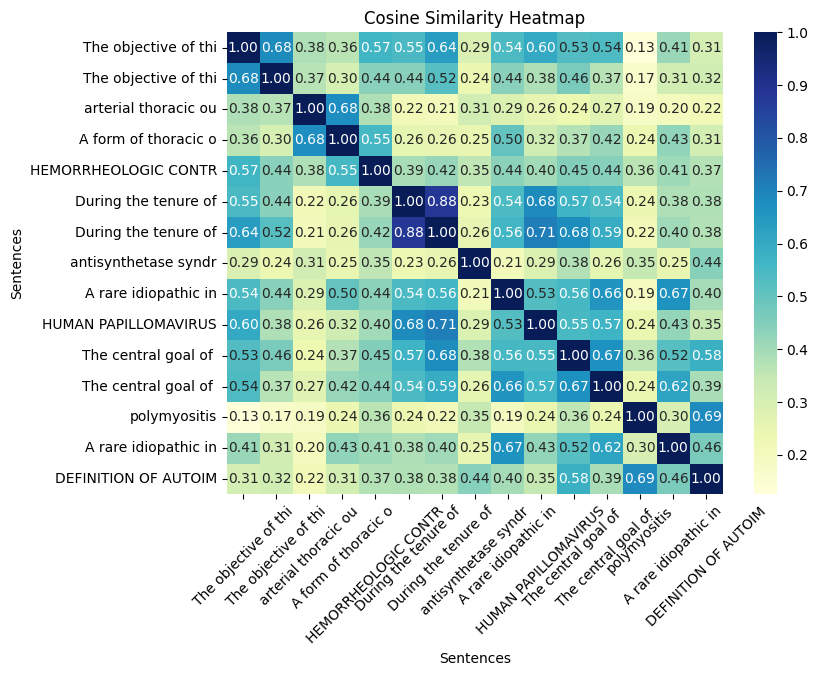

In [ ]:
!pip install sentence-transformers torch transformers
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('stsb-roberta-large')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(similarity, labels, cmap="YlGnBu"):
    df = pd.DataFrame(similarity, index=labels, columns=labels)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(df, cmap=cmap, annot=True, fmt=".2f", ax=ax)
    ax.set_title("Cosine Similarity Heatmap")
    ax.set_xlabel("Sentences")
    ax.set_ylabel("Sentences")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

sentences = [
#Crypto
  'The objective of this project is to study the contribution of hemorrheology to arterial and venous thrombosis using the arterio-venous (A-V) fistula hemodialysis access loop graft as a model. ',
'The objective of this project is to study the contribution of hemorrheology to arterial and venous thrombosis using the arterio-venous (A-V) fistula hemodialysis access loop graft as a model.  Intraoperative measurement of geometry and flowrates will be made after completion of the brachial artery to cephalic vein A-V loop graft in patients with chronic renal failure. Follow-up measurements will be made when patient returns to the hospital for routine hemodialysis treatment (approximately 3 times a week).  These measurements will include:  1) velocity profiles in the host artery using a transcutaneous range-gated ultrasonic Doppler velocimeter probe, 2) phonoangiographic recording of the "thrill" at the venous anastomosis using a precalibrated microphone.  The signal recorded will be analyzed for the power spectral density function (PSDF) using a high-speed computer.  3) Thrombogenicity in the graft and host vein will be measured using 111 Indium labeled autologous platelets in patients with significantly altered PSDF from that of the control.  4) Platelet half-life will also be measured in these patients, using the same 111 Indium labeled autologous platelets. Based on the result of our preliminary animal study, we determined that an animal model using the common femoral artery to common femoral vein loop graft in dogs closely resembles the anatomy of the hemodialysis access loop graft in patients.  Seventy-two femoral-to-femoral loop gragts will be constructed in 36 healthy, preconditioned male dogs.  Six groups of six dogs each will be reoperated at intervals of 24 hrs, 5, 10, 25, 40, and 60 wks postoperatively to obtain 1) phonoangiographic recordings for PSDF, 2) velocity profiles at several sections in the host artery near the anastomosis, 3) physical properties of the host vessels and the graft, 4) detailed lumen geometry by RTV silicone rubber injection, 5) histopathologic examination of the graft and the host vessels include both anastomoses.  Based on the animal data, a series of six to ten in vitro flow models will be fabricated using clear Silastic to represent the venous anastomosis at the various stages of occlusion development.  The model will be installed in the pulsatile flow loop using a blood analog non-Newtonian fluid.  Detailed study of flow patterns, structure of turbulence will be made using laser Doppler anemometer.  The distributions of wall shear stress and Reynolds stress in the flow field will be correlated to the platelet deposition-thrombus formation and histopathological data obtained from patients and animal model.' ,
'arterial thoracic outlet syndrome',
 'A form of thoracic outlet syndrome that presents as unilateral upper extremity ischemia.',
 'HEMORRHEOLOGIC CONTRIBUTION TO THROMBOSIS',
 #'my car is range rover',
#Inflation
 'During the tenure of the previous granting period we, as well as others, have demonstrated the presence of human papillomavirus (HPV) DNA in a variety of premalignant and malignant tumors from patients with wart disease syndromes.',
#Thus, the major objective of this continuing grant application is to determine the involvement, if any, of human papillomaviruses in the progression of certain chronic or recurring wart disease syndromes to the malignant phenotype.
'During the tenure of the previous granting period we, as well as others, have demonstrated the presence of human papillomavirus (HPV) DNA in a variety of premalignant and malignant tumors from patients with wart disease syndromes.  Since the association of HPV DNA with several of these malignant tumors is now established, the most important issue becomes whether or not these viruses contribute to the malignant phenotype.  Thus, the major objective of this continuing grant application is to determine the involvement, if any, of human papillomaviruses in the progression of certain chronic or recurring wart disease syndromes to the malignant phenotype.  To this end our renewal application proposes to:  1) complete our nucleotide sequencing of the HPV DNA species that we have most consistently found associated with malignant tumors both primary and metastatic (i.e., HPV-5 DNA).  We also plan to complete nucleotide sequence analysis of the pertinent regions of the subgenomic and recombinant forms of HPV DNA that we have isolated in an effort to determine the possible mechanism(s) by which these variant forms of HPV DNA are derived; 2) continue our comparative analysis of the expression of HPV in both benign and malignant tissues to determine the specific HPV genetic sequences that might be involved in malignant progression; 3) alternatively, we plan to employ genetic dissection and site-specific mutagenesis of papillomavirus DNA to identify directly those nucleotide sequences responsible for malignant progression by testing such genetically altered DNAs in a DNA transfection assay in vivo using an experimental rabbit model system that we have recently developed in our laboratory; 4) molecularly clone to expression the capsid proteins of HPV-5 with the ultimate objective of determining whether such proteins can reduce the incidence of wart disease in high risk patients and concommitantly reduce the rate of malignant progression; and 5) analyze HPV gene expression in normal skin cells to determine the nature of the HPV genetic sequences required for the maintenance of HPV DNA in these cells.  The methodologies that we plan to employ to achieve these objectives are for the most part already implemented in our laboratory and include a variety of physiochemical, enzymological and filter hybridization techniques available for the analysis of DNA, RNA and protein including nucleotide sequence analysis. ',
"antisynthetase syndrome",
'A rare idiopathic inflammatory myopathy (IIM) characterized principally by myositis, generally symmetrical arthritis and interstitial lung disease (ILD) in association with serum autoantibodies to aminoacyl-transfer RNA synthetases (anti-ARS). More variable features include arthralgia, Raynaud phenomenon, heliotrophic rash, distal esophageal dysmotility and mechanics hands.'   ,
 'HUMAN PAPILLOMAVIRUSES AND MALIGNANT DISEASE',
#common
  'The central goal of this project is to develop the potential of the  recently made observation that there are antibody responses to thymic antigens specific for the dermatomyositis (DM) and polymyositis (PM) syndromes. ',
   'The central goal of this project is to develop the potential of the recently made observation that there are antibody responses to thymic antigens specific for the dermatomyositis (DM) and polymyositis (PM) syndromes.  In the initial reports, these serological reactions utilized crude extracts of thymus tissue as antigen.  Sixty percent of all patients with these diseases possess precipitating antibodies to these antigens. Recent studies with the indirect immunofluorescent technique utilizing human tissue culture lines reveal that at least 80 percent of the patients without precepitins have antibodies.  Thus more than 90 percent of all patients with PM and DM have demonstrable humoral autoimmune responses. Purification of these antigens would permit the collection of several types of data which are of clinical, immunological, and biological interest. Clear resolution of the apparent heterogeneity of these reactions with purified antigens will make possible the quantitative assessment of humoral and cellular immune responses in patients.  Knowledge of the existence of this humoral and cellular immunity will also permit an assessment of whether there are correlations between these immunological responses and disease activity, the presence or absence of tumor, or prognosis. ',
'polymyositis',
 'A rare idiopathic inflammatory myopathy (IIM) historically characterized by symmetric proximal muscle weakness, elevated muscle enzymes (creatine kinase), myopathic findings on electromyography, and muscle biopsy showing endomyial infiltration composed mainly of macrophages and lymphocytes. The features are non-specific, thus the disease should be distinguished from similar entities with specific clinical, immunological, histological features, notably dermatomyositis, immune-mediated necrotizing myopathy, anti-synthetase syndrome, inclusion body myositis, and myositis associated with other connective tissue disorder.' ,
  'DEFINITION OF AUTOIMMUNE RESPONSES IN POLYMYOSITIS'  ]
labels = [sentences[:20] for sentences in sentences]


embeddings = model.encode(sentences, convert_to_tensor=True)

similarity = []
for i in range(len(sentences)):
    row = []
    for j in range(len(sentences)):
      row.append(util.pytorch_cos_sim(embeddings[i], embeddings[j]).item())
    similarity.append(row)

create_heatmap(similarity,labels)

# Other methods

In [ ]:
AAA='''
A syndrome is a set of medical signs and symptoms which are correlated
with each other and often associated with a particular disease or
disorder.[1] The word derives from the Greek σύνδρομον, meaning
 "concurrence".[2]: 1818  When a syndrome is paired with a
 definite cause this becomes a disease.[3] In some instances,
  a syndrome is so closely linked with a pathogenesis or cause
  that the words syndrome, disease, and disorder end up being used
   interchangeably for them. This substitution of terminology
   often confuses the reality and meaning of medical diagnoses.[3]
    This is especially true of inherited syndromes. About one
     third of all phenotypes that are listed in OMIM are described as
     dysmorphic, which usually refers to the facial gestalt.
     For example, Down syndrome, Wolf–Hirschhorn syndrome,
      and Andersen–Tawil syndrome are disorders with known pathogeneses, so each is more than just a set of signs and symptoms, despite the syndrome nomenclature. In other instances, a syndrome is not specific to only one disease. For example, toxic shock syndrome can be caused by various toxins; another medical syndrome named as premotor syndrome can be caused by various brain lesions; and premenstrual syndrome is not a disease but simply a set of symptoms.
If an underlying genetic cause is suspected but not known, a condition may be referred to as a genetic association (often just "association" in context). By definition, an association indicates that the collection of signs and symptoms occurs in combination more frequently than would be likely by chance alone.[2]: 167
If an underlying genetic cause is suspected but not known, a condition may be referred to as a genetic association (often just "association" in context). By definition, an association indicates that the collection of signs and symptoms occurs in combination more frequently than would be likely by chance alone.[2]: 167
Syndromes are often named after the physician or group of physicians that discovered them or initially described the full clinical picture. Such eponymous syndrome names are examples of medical eponyms. Recently, there has been a shift towards naming conditions descriptively (by symptoms or underlying cause) rather than eponymously, but the eponymous syndrome names often persist in common usage.
Syndromes are often named after the physician or group of physicians that discovered them or initially described the full clinical picture. Such eponymous syndrome names are examples of medical eponyms. Recently, there has been a shift towards naming conditions descriptively (by symptoms or underlying cause) rather than eponymously, but the eponymous syndrome names often persist in common usage.
Syndromes are often named after the physician or group of physicians that discovered them or initially described the full clinical picture. Such eponymous syndrome names are examples of medical eponyms. Recently, there has been a shift towards naming conditions descriptively (by symptoms or underlying cause) rather than eponymously, but the eponymous syndrome names often persist in common usage.
Syndromes are often named after the physician or group of physicians that discovered them or initially described the full clinical picture. Such eponymous syndrome names are examples of medical eponyms. Recently, there has been a shift towards naming conditions descriptively (by symptoms or underlying cause) rather than eponymously, but the eponymous syndrome names often persist in common usage.

'''
BBB=  'A woman is peeling potato.'
sentence_pair=[AAA,BBB]

def count_tokens(text):
    # Tokenize the text
    tokens = text.split()  # Assuming space-separated tokens
    # Count the number of tokens
    num_tokens = len(tokens)
    return num_tokens
count_tokens(AAA)

530

In [ ]:
def predict_similarity(sentence_pair, max_length=512):
    # Tokenize the first sentence (a)
    test_input_a = tokenizer(sentence_pair[1],   padding=True, truncation=False,return_tensors="pt").to(device)
    test_input_a['input_ids'] = test_input_a['input_ids']
    test_input_a['attention_mask'] = test_input_a['attention_mask']
    del test_input_a['token_type_ids']
    output_a = model(test_input_a)
    # Check if the length of the second sentence (b) exceeds max_length
    if len(sentence_pair[0]) > max_length:
        # Chunk the second sentence (b)
        chunks = [sentence_pair[0][i:i+max_length] for i in range(0, len(sentence_pair[1]), max_length)]

        # Initialize lists to store outputs
        outputs = []

        # Process each chunk
        for chunk in chunks:
            # Tokenize the chunk
            test_input_b = tokenizer(chunk, padding=True, truncation=False, return_tensors="pt").to(device)
            test_input_b['input_ids'] = test_input_b['input_ids']
            test_input_b['attention_mask'] = test_input_b['attention_mask']
            del test_input_b['token_type_ids']
            output = model(test_input_b)
            outputs.append(output)

        # Concatenate outputs from all chunks along the batch dimension
        output_b = torch.cat(outputs, dim=0)
    else:
        # Tokenize the second sentence (b)
        test_input_b = tokenizer(sentence_pair[1], padding='max_length', max_length=max_length, truncation=True, return_tensors="pt").to(device)
        test_input_b['input_ids'] = test_input_b['input_ids']
        test_input_b['attention_mask'] = test_input_b['attention_mask']
        del test_input_b['token_type_ids']
        output_b = model(test_input_b)

    # Calculate the cosine similarity between the outputs
    sim = torch.nn.functional.cosine_similarity(output_a, output_b, dim=0).item()
    return sim

#predict_similarity(sentence_pair)